In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder



In [2]:
path = 'C:/Users/USA/Downloads/archive (3)/'
file_name = "diabetes_prediction_dataset"

#Leo el archivo con pandas
df3 = pd.read_csv(path + file_name + '.csv')#dataset con el que hice las primeras mediciones
df4 = pd.read_csv(path + file_name + '.csv')
fil3,col3=df3.shape
fil3,col3

(100000, 9)

gender: Gender refers to the classification of individuals as male or female. It is an important demographic factor that can influence various aspects of health and medical conditions.

age: Age represents the number of years a person has lived since birth. It provides insight into the individual's life stage, potential health risks, and susceptibility to certain diseases or conditions associated with specific age groups.

hypertension: Hypertension, often referred to as high blood pressure, is a medical condition characterized by persistently elevated blood pressure in the arteries. It is a significant risk factor for various cardiovascular diseases and can lead to serious health complications if left unmanaged.

heart_disease: Heart disease refers to a range of conditions affecting the heart, such as coronary artery disease, heart failure, or heart rhythm disorders. It is a broad term encompassing various cardiovascular disorders that can impact the overall functioning of the heart.

smoking_history: Smoking history indicates whether an individual has a past or present habit of smoking tobacco products. Smoking is a well-known risk factor for numerous health problems, including respiratory diseases, cardiovascular diseases, and certain types of cancer.

bmi: Body Mass Index (BMI) is a measure of body fat based on an individual's weight and height. It provides an estimation of whether a person's weight is within a healthy range or if they are underweight, overweight, or obese. BMI is commonly used as a screening tool for assessing the risk of weight-related health issues.

HbA1c_level: HbA1c (Hemoglobin A1c) level is a laboratory test that measures the average blood sugar (glucose) levels over the past 2-3 months. It is commonly used in the diagnosis and management of diabetes. Higher HbA1c levels indicate poorer blood sugar control and may indicate the need for adjustments in diabetes treatment.In most labs, the normal range for hemoglobin A1c is 4% to 5.9%. In well-controlled diabetic patients, hemoglobin A1c levels are less than 7.0%. In poorly controlled diabetes, its level is 8.0% or above.

blood_glucose_level: Blood glucose level refers to the concentration of glucose (sugar) in the bloodstream. It is an important indicator of an individual's blood sugar regulation. Abnormal blood glucose levels, either too high (hyperglycemia) or too low (hypoglycemia), can be associated with various health conditions, particularly diabetes.

diabetes: Diabetes is a chronic medical condition characterized by elevated blood sugar levels due to insufficient insulin production or ineffective use of insulin in the body. It requires careful management and monitoring of blood sugar levels to prevent complications. Diabetes can have significant impacts on overall health and may require lifestyle modifications, medication, and regular medical care.

In [3]:
#Encabezado de mis datos
df3.head(5)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df3.isnull().mean().sort_values(ascending = False)


gender                 0.0
age                    0.0
hypertension           0.0
heart_disease          0.0
smoking_history        0.0
bmi                    0.0
HbA1c_level            0.0
blood_glucose_level    0.0
diabetes               0.0
dtype: float64

# Exploratory data analysis EDA

Text(0.5, 1.0, 'Patient genres')

<Figure size 640x480 with 0 Axes>

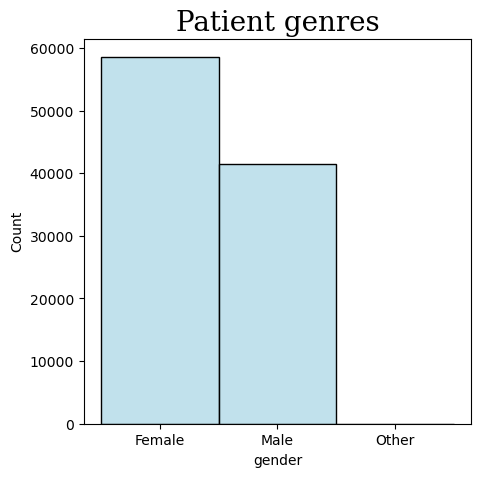

In [5]:
plt.figure()
plt.subplots(1,1,figsize=(5,5))
sns.histplot(data=df3,x="gender", binwidth=3,color="LightBlue")
plt.title("Patient genres",fontdict={'family': 'serif', 
                    'size': 20},loc='center')

Text(0.5, 0, 'Age')

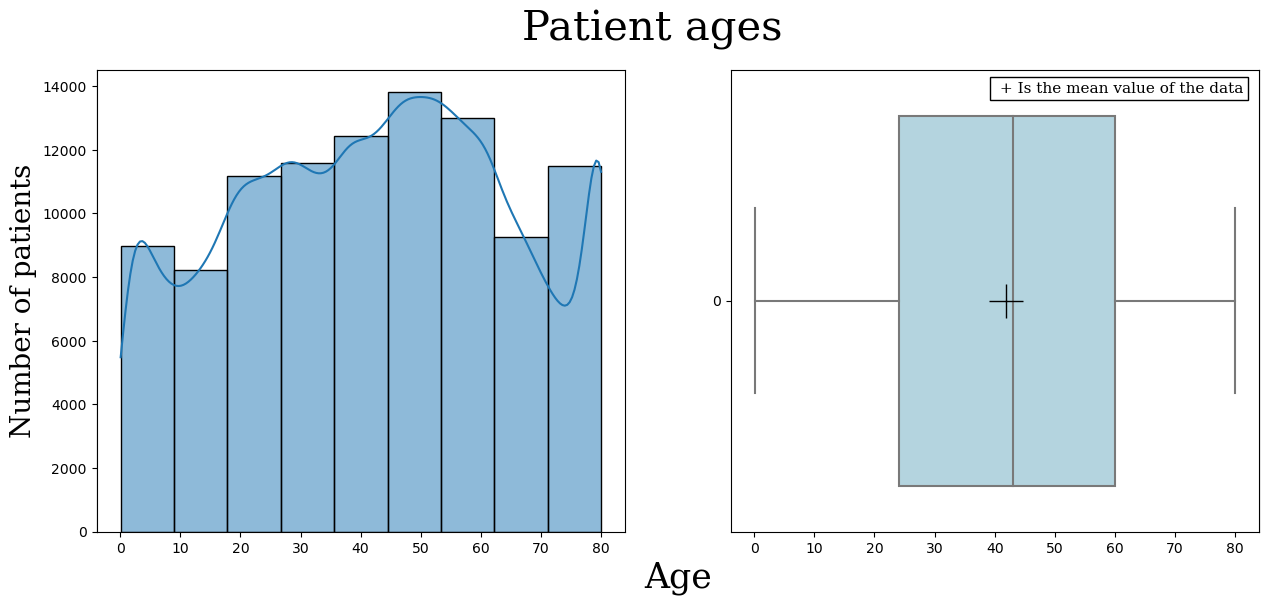

In [6]:

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)    # The big subplot
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
#plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
sns.histplot(df3['age'], bins=9, ax=ax1,kde=True)
sns.boxplot(df3['age'], ax=ax2,orient="h",color="LightBlue",showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "25"})
ax2.text(40,-0.45,' + Is the mean value of the data',bbox=dict(facecolor='none',edgecolor='black',boxstyle='square'),fontdict={'family': 'serif'},size=11)

fig.suptitle('Patient ages ',fontdict={'family': 'serif'},size=30)
#ax2.axes.get_xaxis().set_visible(False)
#ax1.axes.get_xaxis().set_visible(False)
ax1.set_ylabel('Number of patients',fontdict={'family': 'serif'},size=20)
ax2.set_xlabel('',fontdict={'family': 'serif'},size=20)
ax1.set_xlabel('',fontdict={'family': 'serif'},size=20)
ax.set_xlabel('Age',fontdict={'family': 'serif'},size=25)

#ax1.tick_params(labelleft=False, left=False)
#ax.set_xlabel('common xlabel')
#fig.text(0.5, 0.04, 'common X', ha='center')
#fig.text(0.04, 0.5, 'common Y', va='center', rotation='vertical')

Text(0.5, 0, 'Glucose level [mg/dL]')

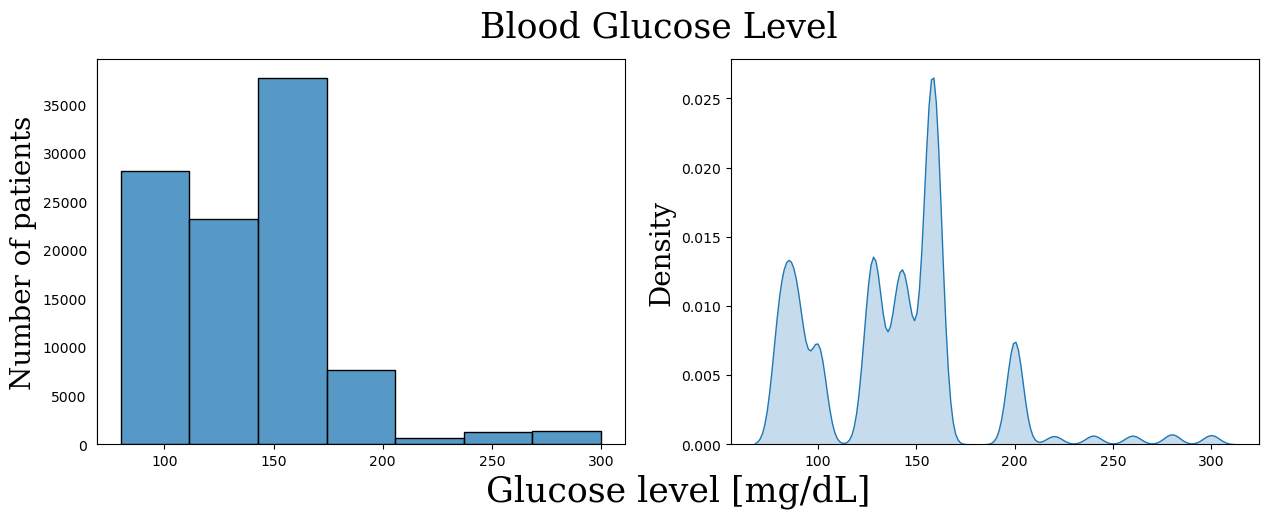

In [7]:



fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)    # The big subplot
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
#plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
sns.kdeplot(data=df3, x='blood_glucose_level',ax=ax2, color = sns.color_palette()[0], fill=True)
sns.histplot(data=df3,ax=ax1,x='blood_glucose_level', color = sns.color_palette()[0], bins=7)
fig.suptitle('Blood Glucose Level',fontdict={'family': 'serif'},size=25)
ax1.tick_params(labelright=False, left=False)
ax1.set_xlabel("Glucose level [mg/dL]",fontdict={'family': 'serif'},size=20)
ax1.axes.get_xaxis().set_visible(True)
ax2.axes.get_xaxis().set_visible(True)
ax1.set_ylabel('Number of patients',fontdict={'family': 'serif'},size=20)
ax2.set_ylabel('Density',fontdict={'family': 'serif'},size=20)
ax1.set_xlabel('',fontdict={'family': 'serif'},size=20)
ax2.set_xlabel('',fontdict={'family': 'serif'},size=20)
ax.set_xlabel('Glucose level [mg/dL]',fontdict={'family': 'serif'},size=25)



#fig.text(0.5, 0.04, 'common X', ha='center')
#fig.text(0.04, 0.5, 'common Y', va='center', rotation='vertical')

Text(0.2, 272, ' + Is the mean value of the data')

<Figure size 1000x1000 with 0 Axes>

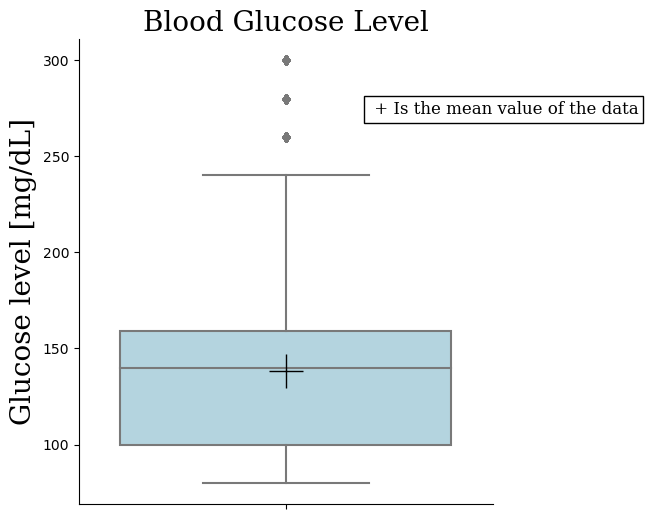

In [8]:
plt.figure(figsize=(10,10))
sns.catplot(kind='box', data=df3,color ="LightBlue", y='blood_glucose_level',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "25"})
plt.ylabel('Glucose level [mg/dL]',fontdict={'family': 'serif'},size=20)
plt.title('Blood Glucose Level',fontdict={'family': 'serif'},size=20)
plt.text(0.2,272,' + Is the mean value of the data',bbox=dict(facecolor='none',edgecolor='black',boxstyle='square'),fontdict={'family': 'serif'},size=12)


[Text(0, 0, 'No Hypertension'), Text(1, 0, 'Hypertension')]

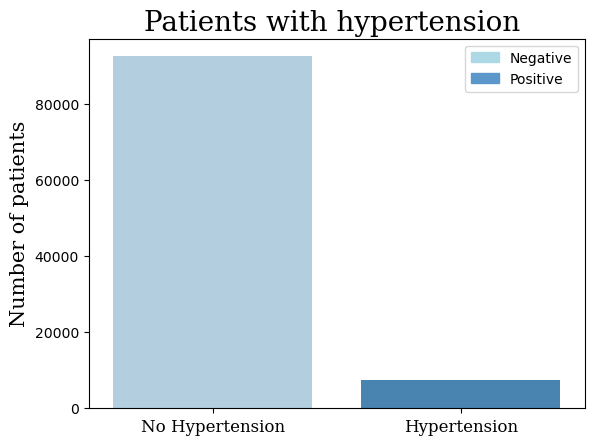

In [9]:
import matplotlib.patches as mpatches
ax=sns.countplot(data=df3,x="hypertension",palette="Blues")
red_patch = mpatches.Patch(color='LightBlue', label='Negative')
blue=mpatches.Patch(color='#5b97ca', label='Positive')
plt.legend(handles=[red_patch,blue])

plt.title('Patients with hypertension ',fontdict={'family': 'serif'},size=20)
#ax.axes.get_xaxis().set_visible(False)

ax.set_ylabel('Number of patients',fontdict={'family': 'serif'},size=15)
ax.set_xlabel('',fontdict={'family': 'serif'},size=20)
ax.set_xticklabels(['No Hypertension', 'Hypertension'],fontdict={'family': 'serif'},size=12)


Text(0.5, 0, '')

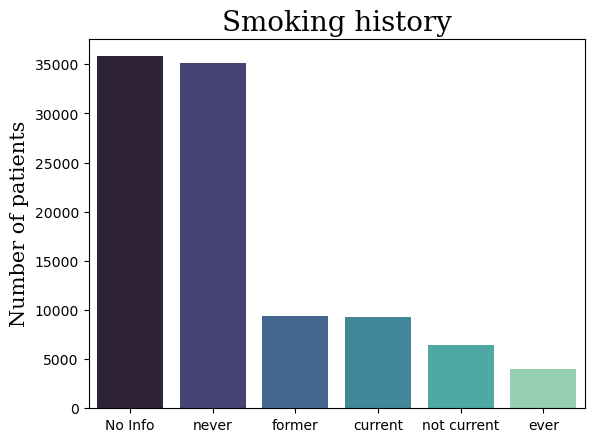

In [10]:
plt.title('Smoking history',fontdict={'family': 'serif'},size=20)
sns.countplot(data=df3,palette="mako", x='smoking_history', order=df3['smoking_history'].value_counts().index)

plt.ylabel('Number of patients',fontdict={'family': 'serif'},size=15)
plt.xlabel('',fontdict={'family': 'serif'},size=20)


Text(0.5, 0, 'BMI [$Kg/m^2$]')

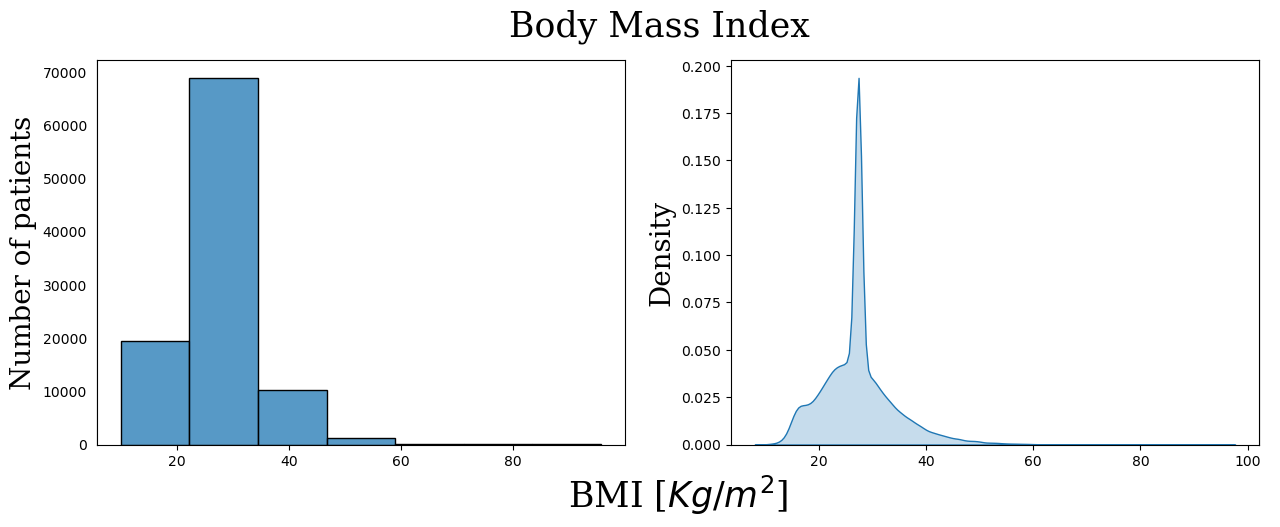

In [11]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)    # The big subplot
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
#plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
sns.kdeplot(data=df3, x='bmi',ax=ax2, color = sns.color_palette()[0], fill=True)
sns.histplot(data=df3, ax=ax1,x='bmi', color = sns.color_palette()[0], bins=7)
fig.suptitle('Body Mass Index',fontdict={'family': 'serif'},size=25)
ax1.tick_params(labelright=False, left=False)
ax1.set_xlabel("Glucose level [mg/dL]",fontdict={'family': 'serif'},size=20)
ax1.axes.get_xaxis().set_visible(True)
ax2.axes.get_xaxis().set_visible(True)
ax1.set_ylabel('Number of patients',fontdict={'family': 'serif'},size=20)
ax2.set_ylabel('Density',fontdict={'family': 'serif'},size=20)
ax1.set_xlabel('',fontdict={'family': 'serif'},size=20)
ax2.set_xlabel('',fontdict={'family': 'serif'},size=20)
ax.set_xlabel('BMI [$Kg/m^2$]',fontdict={'family': 'serif'},size=25)


Text(0.5, 0, '')

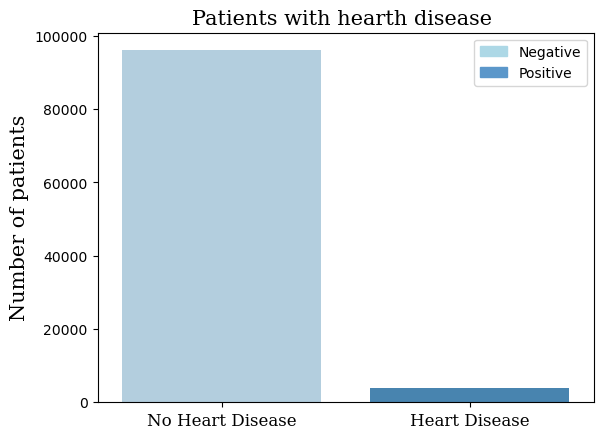

In [12]:
ax = sns.countplot(data=df3, x='heart_disease',palette="Blues")

red_patch = mpatches.Patch(color='LightBlue', label='Negative')
blue=mpatches.Patch(color='#5b97ca', label='Positive')
plt.legend(handles=[red_patch,blue])
ax.set(title='Count Plot of Heart Disease')
ax.set_xticklabels(['No Heart Disease', 'Heart Disease'],fontdict={'family': 'serif'},size=12)
plt.title('Patients with hearth disease ',fontdict={'family': 'serif'},size=15)
ax.axes.get_xaxis().set_visible(True)

ax.set_ylabel('Number of patients',fontdict={'family': 'serif'},size=15)
ax.set_xlabel('',fontdict={'family': 'serif'},size=20)


Text(0.5, 0, '')

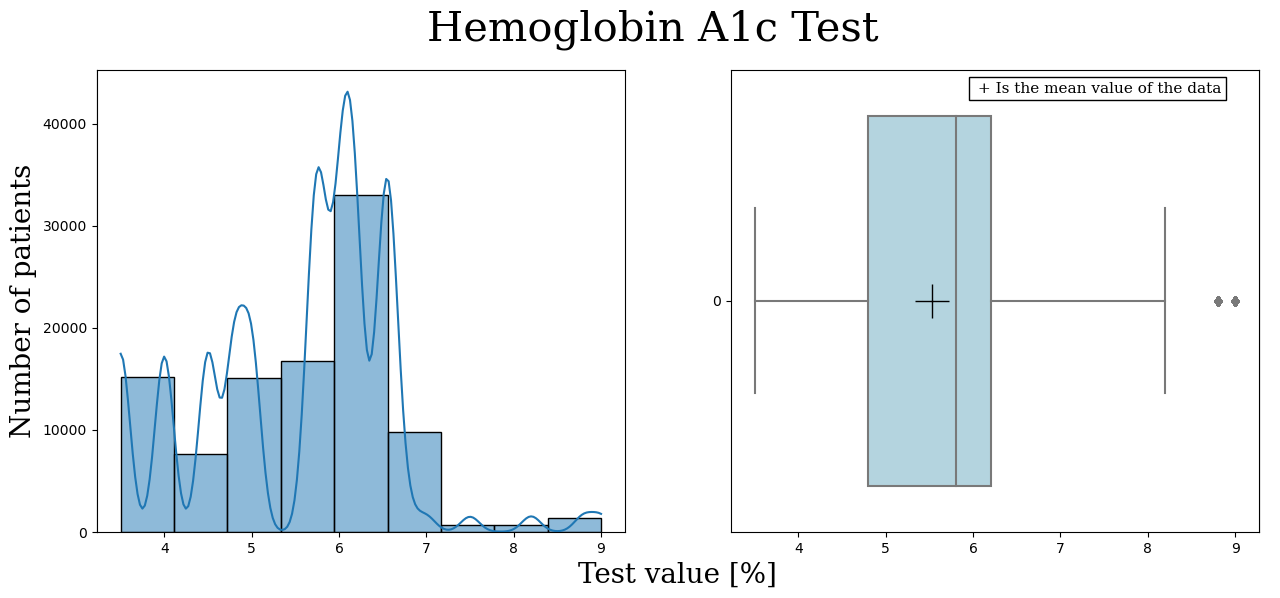

In [13]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)    # The big subplot
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
#plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
sns.histplot(df3['HbA1c_level'], bins=9, ax=ax1,kde=True)

sns.boxplot(df3['HbA1c_level'], orient="h",ax=ax2,color="LightBlue",showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "25"})
ax2.text(6,-0.45,' + Is the mean value of the data',bbox=dict(facecolor='none',edgecolor='black',boxstyle='square'),fontdict={'family': 'serif'},size=11)

fig.suptitle('Hemoglobin A1c Test ',fontdict={'family': 'serif'},size=30)
#ax2.axes.get_xaxis().set_visible(False)
#ax1.axes.get_xaxis().set_visible(False)
ax1.set_ylabel('Number of patients',fontdict={'family': 'serif'},size=20)
ax.set_xlabel('Test value [%]',fontdict={'family': 'serif'},size=20)
ax1.set_xlabel('',fontdict={'family': 'serif'},size=20)

Text(0.5, 0, '')

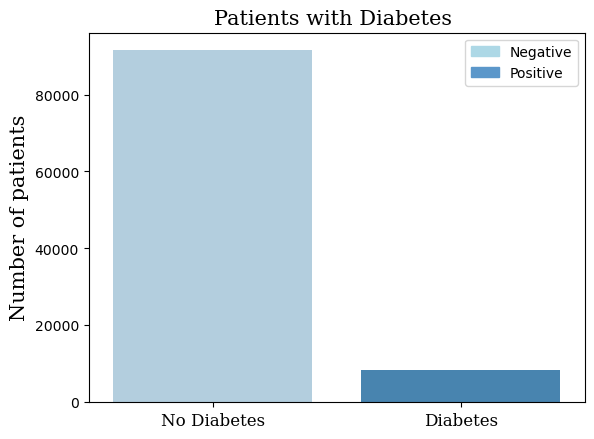

In [14]:
ax = sns.countplot(data=df3, x='diabetes',palette="Blues")

red_patch = mpatches.Patch(color='LightBlue', label='Negative')
blue=mpatches.Patch(color='#5b97ca', label='Positive')
plt.legend(handles=[red_patch,blue])

ax.set_xticklabels(['No Diabetes', 'Diabetes'],fontdict={'family': 'serif'},size=12)
plt.title('Patients with Diabetes ',fontdict={'family': 'serif'},size=15)
ax.axes.get_xaxis().set_visible(True)

ax.set_ylabel('Number of patients',fontdict={'family': 'serif'},size=15)
ax.set_xlabel('',fontdict={'family': 'serif'},size=20)


[Text(0, 0, 'Age'),
 Text(1, 0, 'Hypertension'),
 Text(2, 0, 'Heart Disease'),
 Text(3, 0, 'BMI'),
 Text(4, 0, 'HbAC1'),
 Text(5, 0, 'Blood glucose level')]

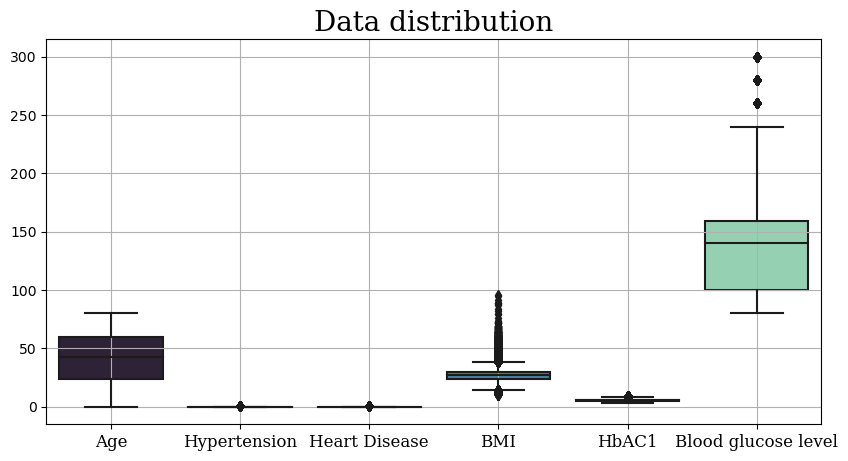

In [15]:
plt.figure(figsize=(10,5))
ax=sns.boxplot(df3.drop('diabetes',axis=1),palette="mako")
plt.title("Data distribution",fontdict={'family': 'serif'},size=20)
plt.grid()
#ax.axes.get_xaxis().set_visible(False)
ax.set_xticklabels(['Age', 'Hypertension',"Heart Disease","BMI","HbAC1","Blood glucose level"],fontdict={'family': 'serif'},size=12)


In [16]:
df3.select_dtypes(exclude = 'object').describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [17]:
df3.select_dtypes(include = 'object').describe()

,gender,smoking_history
count,100000,100000
unique,3,6
top,Female,No Info
freq,58552,35816


Text(0.5, 1.0, 'Relation between gender and Diabetes ')

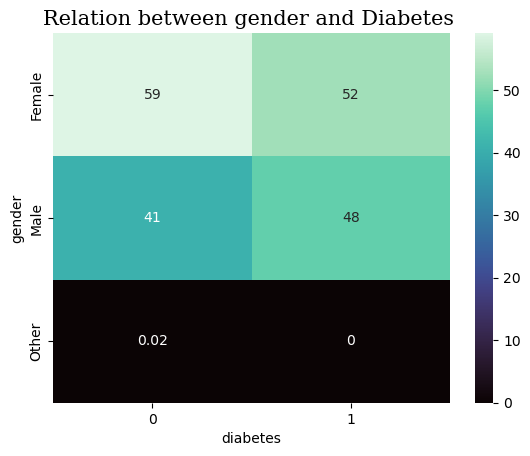

In [18]:
temp_df = pd.crosstab(df3['gender'], df3['diabetes'], normalize='columns')*100
sns.heatmap(temp_df, annot=True, cmap='mako')
plt.title('Relation between gender and Diabetes ',loc="center",fontdict={'family': 'serif'},size=15)

C:\Users\USA\AppData\Local\Temp\ipykernel_14464\424710825.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df3.corr("pearson")


Text(0.5, 1.0, 'Pearson correlation between numerical variables')

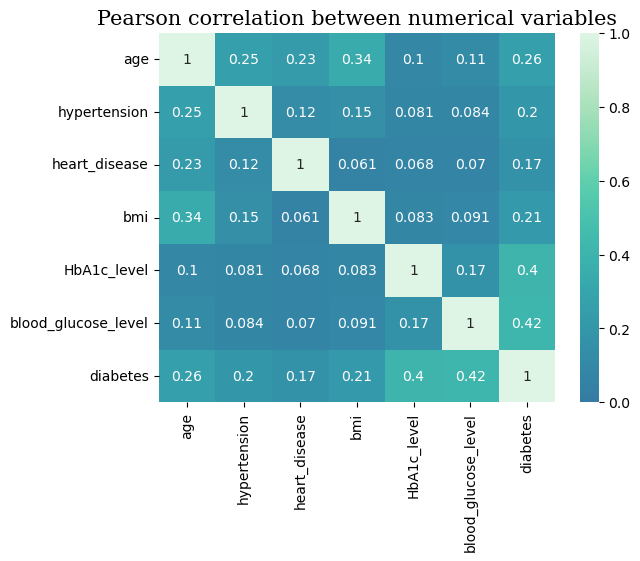

In [19]:
corr = df3.corr("pearson")
sns.heatmap(corr, vmin=0, center=0, vmax=1, annot=True,cmap='mako')
plt.title("Pearson correlation between numerical variables",loc="center",fontdict={'family': 'serif'},size=15)

In [20]:
df3['diabetes'].value_counts()
#Veo que los resultados están bastantes inclinados hacia un resultado negativo

0    91500
1     8500
Name: diabetes, dtype: int64

Text(0.5, 1.0, 'Diabetes VS Age')

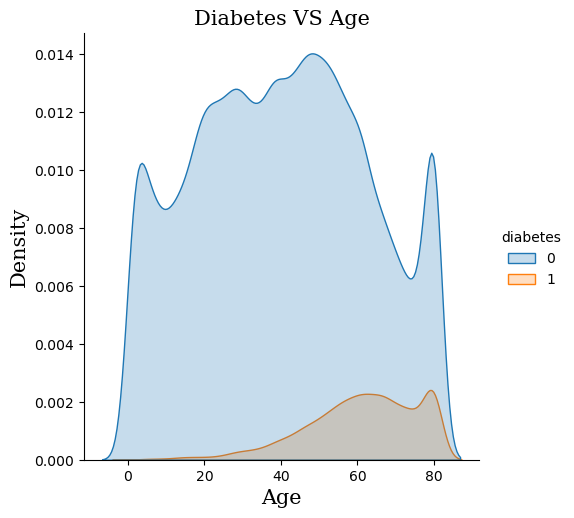

In [21]:
#Análisis bivariado 
sns.displot(kind="kde",data=df3, x='age', hue='diabetes', fill=True)
plt.xlabel("Age",fontdict={'family': 'serif'},size=15)
plt.ylabel("Density",fontdict={'family': 'serif'},size=15)
plt.title("Diabetes VS Age",fontdict={'family': 'serif'},size=15)

[Text(0, 0, 'No Diabetes'), Text(1, 0, 'Diabetes')]

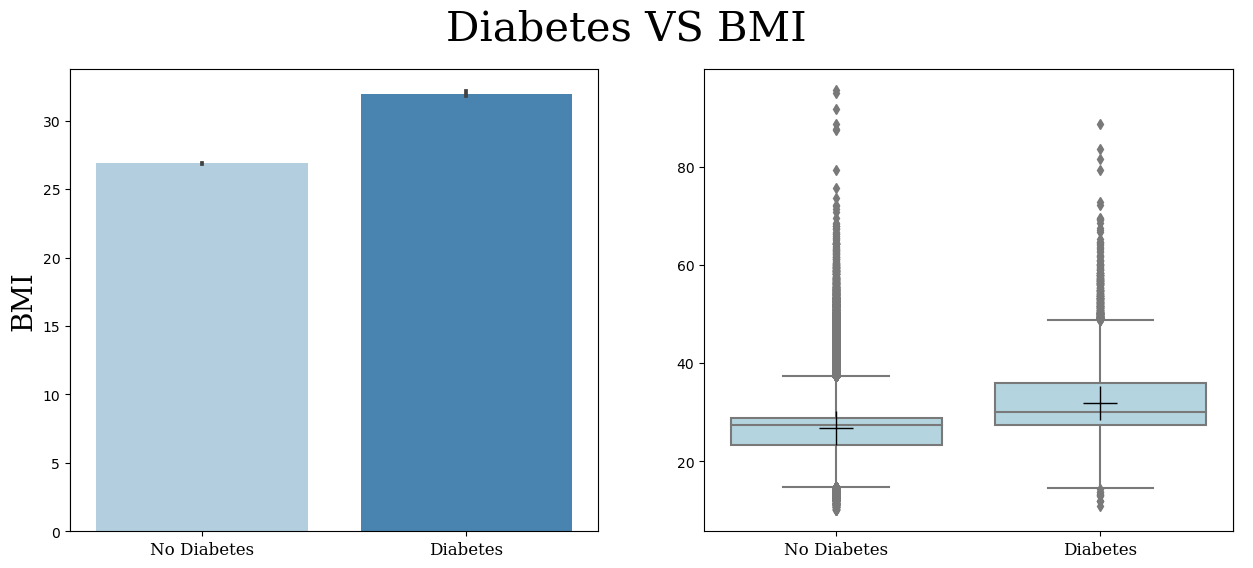

In [22]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)    # The big subplot
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
#plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

sns.barplot(data=df3, x='diabetes', y='bmi',ax=ax1,palette="Blues")
ax1.set_xticklabels(['No Diabetes', 'Diabetes'],fontdict={'family': 'serif'},size=12)


sns.boxplot(data=df3, x='diabetes', y='bmi',ax=ax2,color="LightBlue",showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "25"})
#ax2.text(6,-0.45,' + Is the mean value of the data',bbox=dict(facecolor='none',edgecolor='black',boxstyle='square'),fontdict={'family': 'serif'},size=11)

fig.suptitle('Diabetes VS BMI ',fontdict={'family': 'serif'},size=30)
#ax2.axes.get_yaxis().set_visible(False)
#ax1.axes.get_xaxis().set_visible(False)
ax1.set_ylabel('BMI',fontdict={'family': 'serif'},size=20)
ax.set_xlabel('',fontdict={'family': 'serif'},size=20)
ax1.set_xlabel('',fontdict={'family': 'serif'},size=20)
ax2.set_ylabel('',fontdict={'family': 'serif'},size=20)
ax2.set_xlabel('',fontdict={'family': 'serif'},size=20)

ax2.set_xticklabels(['No Diabetes', 'Diabetes'],fontdict={'family': 'serif'},size=12)


[Text(0, 0, 'No Diabetes'), Text(1, 0, 'Diabetes')]

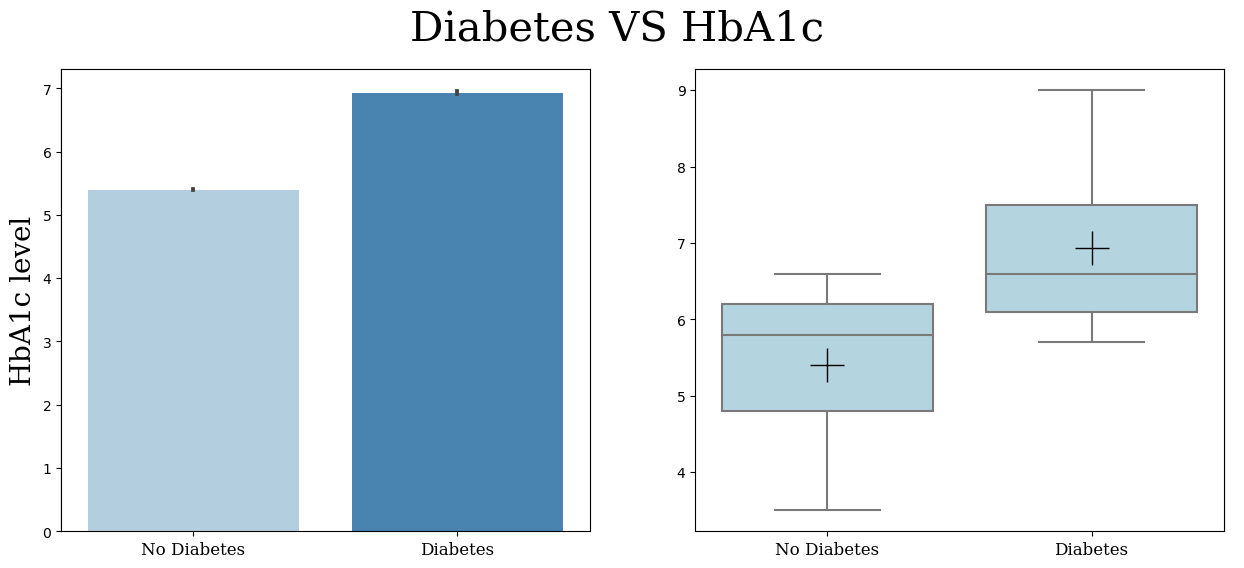

In [23]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)    # The big subplot
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
#plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

sns.barplot(data=df3, x='diabetes', y='HbA1c_level',ax=ax1,palette="Blues")
ax1.set_xticklabels(['No Diabetes', 'Diabetes'],fontdict={'family': 'serif'},size=12)


sns.boxplot(data=df3, x='diabetes', y='HbA1c_level',ax=ax2,color="LightBlue",showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "25"})
#ax2.text(6,-0.45,' + Is the mean value of the data',bbox=dict(facecolor='none',edgecolor='black',boxstyle='square'),fontdict={'family': 'serif'},size=11)

fig.suptitle('Diabetes VS HbA1c ',fontdict={'family': 'serif'},size=30)
#ax2.axes.get_yaxis().set_visible(False)
#ax1.axes.get_xaxis().set_visible(False)
ax1.set_ylabel('HbA1c level',fontdict={'family': 'serif'},size=20)
ax.set_xlabel('',fontdict={'family': 'serif'},size=20)
ax1.set_xlabel('',fontdict={'family': 'serif'},size=20)
ax2.set_ylabel('',fontdict={'family': 'serif'},size=20)
ax2.set_xlabel('',fontdict={'family': 'serif'},size=20)

ax2.set_xticklabels(['No Diabetes', 'Diabetes'],fontdict={'family': 'serif'},size=12)


[Text(0, 0, 'No Diabetes'), Text(1, 0, 'Diabetes')]

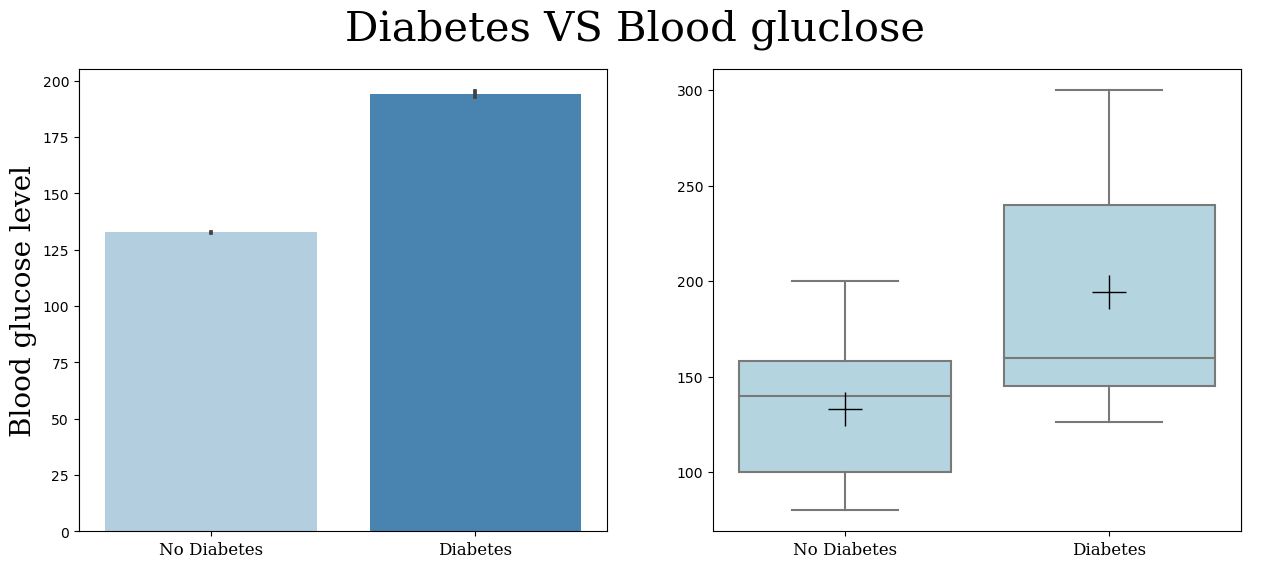

In [24]:

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)    # The big subplot
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
#plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

sns.barplot(data=df3, x='diabetes', y='blood_glucose_level',ax=ax1,palette="Blues")
ax1.set_xticklabels(['No Diabetes', 'Diabetes'],fontdict={'family': 'serif'},size=12)


sns.boxplot(data=df3, x='diabetes', y='blood_glucose_level',ax=ax2,color="LightBlue",showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "25"})
#ax2.text(6,-0.45,' + Is the mean value of the data',bbox=dict(facecolor='none',edgecolor='black',boxstyle='square'),fontdict={'family': 'serif'},size=11)

fig.suptitle('Diabetes VS Blood gluclose ',fontdict={'family': 'serif'},size=30)
#ax2.axes.get_yaxis().set_visible(False)
#ax1.axes.get_xaxis().set_visible(False)
ax1.set_ylabel('Blood glucose level',fontdict={'family': 'serif'},size=20)
ax.set_xlabel('',fontdict={'family': 'serif'},size=20)
ax1.set_xlabel('',fontdict={'family': 'serif'},size=20)
ax2.set_ylabel('',fontdict={'family': 'serif'},size=20)
ax2.set_xlabel('',fontdict={'family': 'serif'},size=20)

ax2.set_xticklabels(['No Diabetes', 'Diabetes'],fontdict={'family': 'serif'},size=12)


In [25]:
from sklearn.metrics import matthews_corrcoef

In [26]:
X=df3["diabetes"]
y1=df3["hypertension"]
y2=df3["heart_disease"]


In [27]:
#For binary values
mat1=matthews_corrcoef(X, y1)
mat2=matthews_corrcoef(X, y2)
print("According to Matthew correlation   ")
print("Diabetes and hypertension have a correlation of: {:.3f}".format(mat1))
print("Diabetes and heart disease have a correlation of: {:.3f}".format(mat2))


According to Matthew correlation   
Diabetes and hypertension have a correlation of: 0.198
Diabetes and heart disease have a correlation of: 0.172


In [28]:
from scipy import stats
#For binary and numerical values
y3=df3["age"]
y4=df3["bmi"]
y5=df3["HbA1c_level"]
y6=df3["blood_glucose_level"]


a,b=stats.pointbiserialr(X, y3)
b,d=stats.pointbiserialr(X, y4)
c,f=stats.pointbiserialr(X, y5)
d,e=stats.pointbiserialr(X, y6)
print("According to Biserial correlation   ")
print("Diabetes and age have a correlation of: {:.3f}".format(a))
print("Diabetes and BMI have a correlation of: {:.3f}".format(b))
print("Diabetes and HbA1c have a correlation of: {:.3f}".format(c))
print("Diabetes and Glucose level in blood have a correlation of: {:.3f}".format(d))



According to Biserial correlation   
Diabetes and age have a correlation of: 0.258
Diabetes and BMI have a correlation of: 0.214
Diabetes and HbA1c have a correlation of: 0.401
Diabetes and Glucose level in blood have a correlation of: 0.420


# Encoding

In [29]:

def encode(data):
    encoder = data.copy()
    model=LabelEncoder()
    encoder['gender']=model.fit_transform(encoder['gender'])
    encoder['smoking_history']=model.fit_transform(encoder['smoking_history'])
    return encoder
df3=encode(df3)
df3

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


# Split

In [30]:
X=df3.drop('diabetes',axis=1)
y=df3['diabetes']
X

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90
99996,0,2.0,0,0,0,17.37,6.5,100
99997,1,66.0,0,0,3,27.83,5.7,155
99998,0,24.0,0,0,4,35.42,4.0,100


In [31]:
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.2)

model=StandardScaler()
model.fit_transform(x_train)
model.fit_transform(x_test)
print("X TRAIN SHAPE: ",x_train.shape)
print("X TEST SHAPE: ",x_test.shape)
print("Y TRAIN SHAPE: ",y_train.shape)
print("Y TEST SHAPE: ",y_test.shape)



X TRAIN SHAPE:  (80000, 8)
X TEST SHAPE:  (20000, 8)
Y TRAIN SHAPE:  (80000,)
Y TEST SHAPE:  (20000,)


# Predicciones 


In [35]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression().fit(x_train,y_train)
knn = KNeighborsClassifier().fit(x_train,y_train)
arbol = DecisionTreeClassifier(random_state=42).fit(x_train,y_train)
rand=RandomForestClassifier().fit(x_train,y_train)

#Ahora las predicciones 
lrpre=lr.predict(x_test)
knnpre=knn.predict(x_test)
arbolpre=arbol.predict(x_test)
randpre=rand.predict(x_test)

C:\Users\USA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
#Ahora algunas métricas 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

a=accuracy_score(y_test,lrpre)
b=accuracy_score(y_test,knnpre)
c=accuracy_score(y_test,arbolpre)
d=accuracy_score(y_test,randpre)



print("Usando Accuracy Score las métricas fueron de: ")
print("-Logistic Regresion: {:.4f}".format(a))
print("-KNN: {:.4f}".format(b))
print("-Tree Decision: {:.4f}".format(c))
print("-Random Forest: {:.4f}".format(d))

Usando Accuracy Score las métricas fueron de: 
-Logistic Regresion: 0.9521
-KNN: 0.9546
-Tree Decision: 0.9544
-Random Forest: 0.9708


               Resume for Logistic regression metrics
              precision    recall  f1-score   support

           0      0.963     0.986     0.974     18299
           1      0.796     0.587     0.676      1701

    accuracy                          0.952     20000
   macro avg      0.879     0.786     0.825     20000
weighted avg      0.948     0.952     0.949     20000



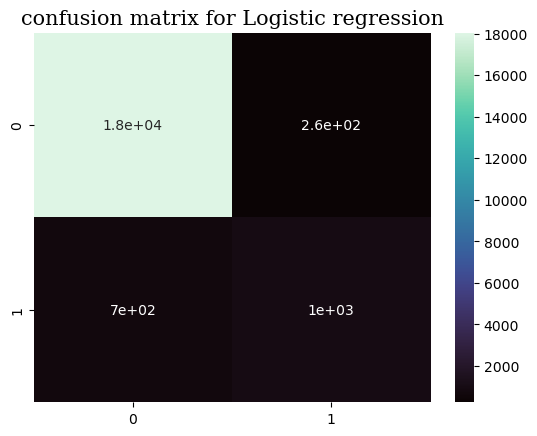

In [37]:
from sklearn.metrics import confusion_matrix,classification_report

cn=confusion_matrix(y_test,lrpre)
sns.heatmap(cn,annot=True,cmap='mako')
plt.title("confusion matrix for Logistic regression",loc="center",fontdict={'family': 'serif'},size=15)

print("               Resume for Logistic regression metrics")
print(metrics.classification_report(y_test, lrpre, digits=3))

               Resume for KNN metrics
              precision    recall  f1-score   support

           0      0.959     0.993     0.976     18299
           1      0.879     0.540     0.669      1701

    accuracy                          0.955     20000
   macro avg      0.919     0.767     0.822     20000
weighted avg      0.952     0.955     0.950     20000



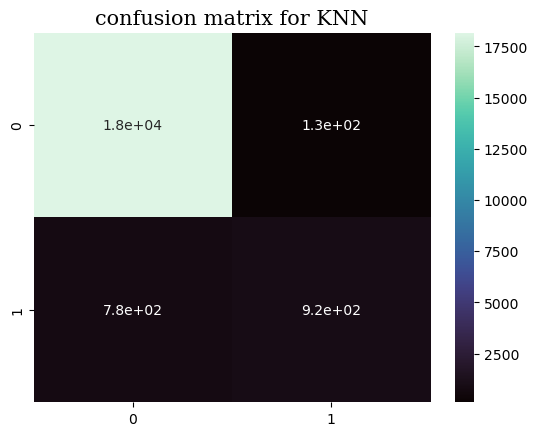

In [38]:
cn1=confusion_matrix(y_test,knnpre)
sns.heatmap(cn1,annot=True,cmap='mako')
plt.title("confusion matrix for KNN",loc="center",fontdict={'family': 'serif'},size=15)
print("               Resume for KNN metrics")
print(metrics.classification_report(y_test, knnpre, digits=3))

               Resumen de Tree decision
              precision    recall  f1-score   support

           0      0.976     0.974     0.975     18299
           1      0.726     0.744     0.735      1701

    accuracy                          0.954     20000
   macro avg      0.851     0.859     0.855     20000
weighted avg      0.955     0.954     0.955     20000



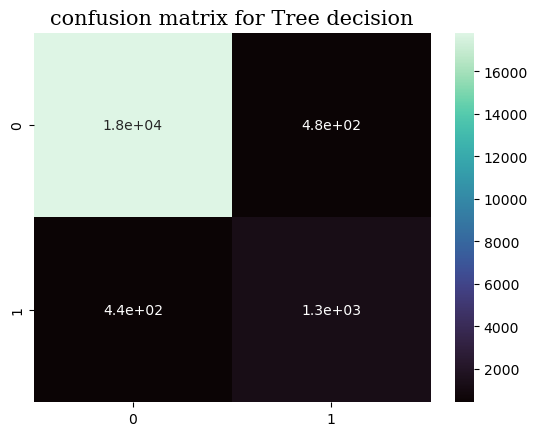

In [39]:
cn2=confusion_matrix(y_test,arbolpre)
sns.heatmap(cn2,annot=True,cmap='mako')
plt.title("confusion matrix for Tree decision",loc="center",fontdict={'family': 'serif'},size=15)
print("               Resumen de Tree decision")
print(metrics.classification_report(y_test, arbolpre, digits=3))

               Resumen Random forest
              precision    recall  f1-score   support

           0      0.972     0.997     0.984     18299
           1      0.954     0.691     0.801      1701

    accuracy                          0.971     20000
   macro avg      0.963     0.844     0.893     20000
weighted avg      0.970     0.971     0.969     20000



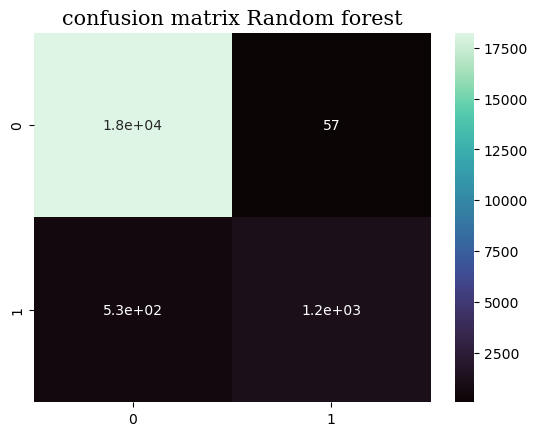

In [41]:
cn2=confusion_matrix(y_test,randpre)
sns.heatmap(cn2,annot=True,cmap='mako')
plt.title("confusion matrix Random forest",loc="center",fontdict={'family': 'serif'},size=15)
print("               Resumen Random forest")
print(metrics.classification_report(y_test, randpre, digits=3))

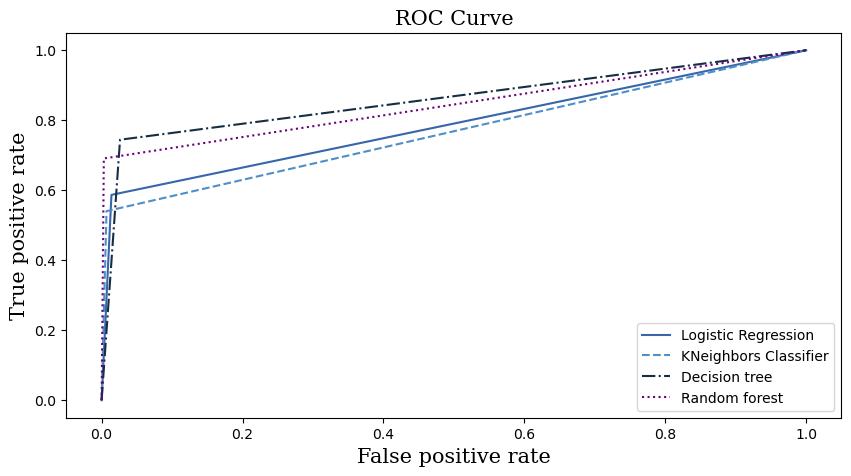

In [47]:
#Ahora, haré la gráfica de ROC auc
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, lrpre, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, knnpre, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, arbolpre, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, randpre, pos_label=1)
plt.figure(figsize=(10,5))
plt.plot(fpr1, tpr1, linestyle='-',color='#3766ab', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='#4f8fc6', label='KNeighbors Classifier')
plt.plot(fpr3, tpr3, linestyle="dashdot",color='#152e43', label='Decision tree')
plt.plot(fpr4, tpr4, linestyle=":",color='#6B007B', label="Random forest")

plt.xlabel('False positive rate',fontdict={'family': 'serif'},size=15)
plt.ylabel('True positive rate',fontdict={'family': 'serif'},size=15)
plt.legend()
plt.title("ROC Curve",loc="center",fontdict={'family': 'serif'},size=15)

plt.show()

In [48]:
"""Despues de evidenciar que el dataset no se encuentra balanceado, se repiten los modelos con el dataset balanceado"""
df4=encode(df4)
X=df4.drop('diabetes',axis=1)
y=df4['diabetes']

x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.25)

#Usaré SMOTE para balancear el dataset 
from imblearn.over_sampling import SMOTE
oversampler = SMOTE()
x_over, y_over = oversampler.fit_resample(x_train, y_train)




print("X TRAIN SHAPE: ",x_over.shape)
print("X TEST SHAPE: ",x_test.shape)
print("Y TRAIN SHAPE: ",y_over.shape)
print("Y TEST SHAPE: ",y_test.shape)


scale=StandardScaler()
x_scaled=scale.fit_transform(x_over)
xtest_scaled=scale.fit_transform(x_test)

X TRAIN SHAPE:  (137302, 8)
X TEST SHAPE:  (25000, 8)
Y TRAIN SHAPE:  (137302,)
Y TEST SHAPE:  (25000,)


In [50]:




lr=LogisticRegression().fit(x_scaled,y_over)
knn = KNeighborsClassifier().fit(x_scaled,y_over)
arbol = DecisionTreeClassifier(random_state=42).fit(x_scaled,y_over)
rand=RandomForestClassifier().fit(x_scaled,y_over)


#Ahora las predicciones 
lrpre=lr.predict(xtest_scaled)
knnpre=knn.predict(xtest_scaled)
arbolpre=arbol.predict(xtest_scaled)
randpre=rand.predict(xtest_scaled)

In [51]:
a=accuracy_score(y_test,lrpre)
b=accuracy_score(y_test,knnpre)
c=accuracy_score(y_test,arbolpre)
d=accuracy_score(y_test,randpre)

print("Usando Accuracy Score las métricas fueron de: ")
print("-Logistic regression: {:.4f}".format(a))
print("-KNN: {:.4f}".format(b))
print("-Tree Decision: {:.4f}".format(c))
print("-Random Forest: {:.4f}".format(d))

Usando Accuracy Score las métricas fueron de: 
-Logistic regression: 0.5836
-KNN: 0.6965
-Tree Decision: 0.4858
-Random Forest: 0.5542


               Resume for Logistic regression metrics
              precision    recall  f1-score   support

           0      1.000     0.545     0.705     22849
           1      0.171     0.999     0.292      2151

    accuracy                          0.584     25000
   macro avg      0.585     0.772     0.499     25000
weighted avg      0.928     0.584     0.670     25000



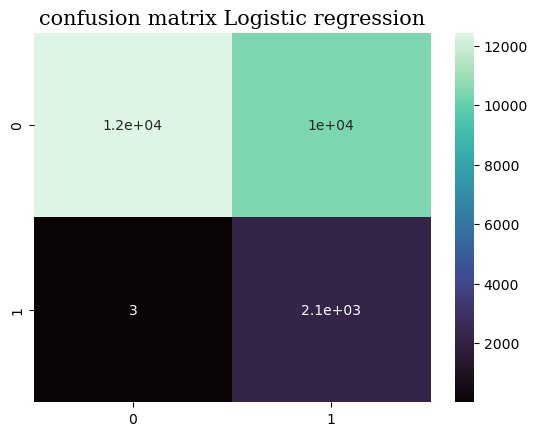

In [52]:
cn=confusion_matrix(y_test,lrpre)
sns.heatmap(cn,annot=True,cmap='mako')
plt.title("confusion matrix Logistic regression",loc="center",fontdict={'family': 'serif'},size=15)

print("               Resume for Logistic regression metrics")
print(metrics.classification_report(y_test, lrpre, digits=3))

               Resumen KNN metricas
              precision    recall  f1-score   support

           0      0.993     0.673     0.802     22849
           1      0.215     0.951     0.350      2151

    accuracy                          0.696     25000
   macro avg      0.604     0.812     0.576     25000
weighted avg      0.926     0.696     0.763     25000



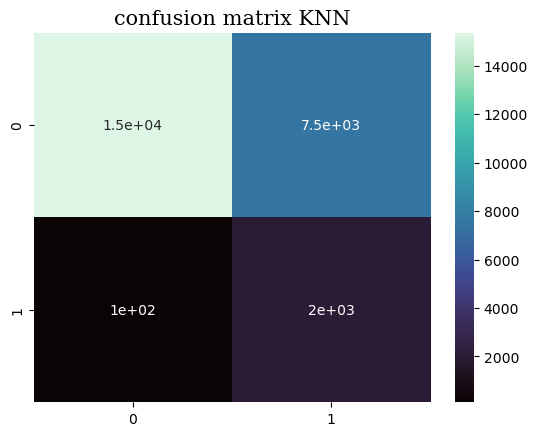

In [53]:
cn1=confusion_matrix(y_test,knnpre)
sns.heatmap(cn1,annot=True,cmap='mako')
plt.title("confusion matrix KNN",loc="center",fontdict={'family': 'serif'},size=15)
print("               Resumen KNN metricas")
print(metrics.classification_report(y_test, knnpre, digits=3))

               Resumen Random forest
              precision    recall  f1-score   support

           0      0.998     0.513     0.678     22849
           1      0.160     0.987     0.276      2151

    accuracy                          0.554     25000
   macro avg      0.579     0.750     0.477     25000
weighted avg      0.926     0.554     0.643     25000



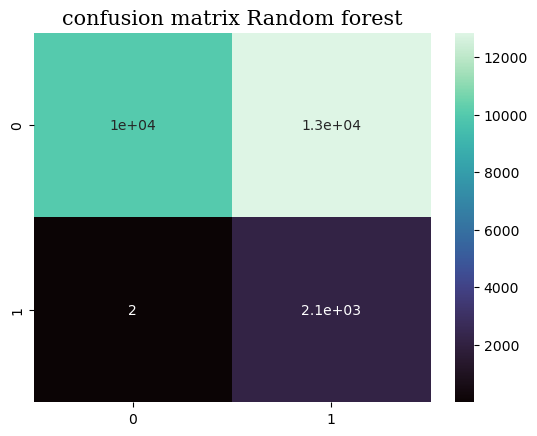

In [54]:
cn2=confusion_matrix(y_test,arbolpre)
sns.heatmap(cn2,annot=True,cmap='mako')
plt.title("confusion matrix Random forest",loc="center",fontdict={'family': 'serif'},size=15)
print("               Resumen Random forest")
print(metrics.classification_report(y_test, randpre, digits=3))

               Resumen de Tree decision
              precision    recall  f1-score   support

           0      1.000     0.437     0.609     22849
           1      0.143     0.999     0.251      2151

    accuracy                          0.486     25000
   macro avg      0.572     0.718     0.430     25000
weighted avg      0.926     0.486     0.578     25000



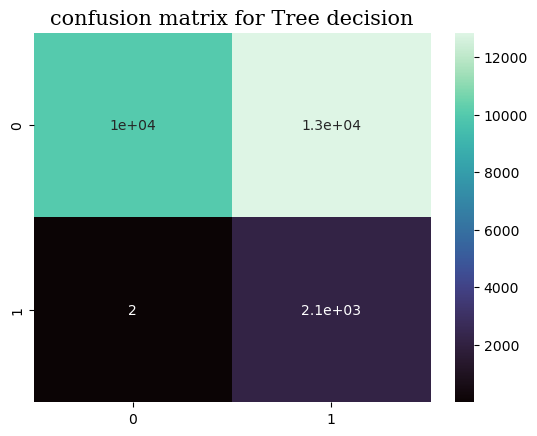

In [55]:
cn3=confusion_matrix(y_test,arbolpre)
sns.heatmap(cn2,annot=True,cmap='mako')
plt.title("confusion matrix for Tree decision",loc="center",fontdict={'family': 'serif'},size=15)
print("               Resumen de Tree decision")
print(metrics.classification_report(y_test, arbolpre, digits=3))

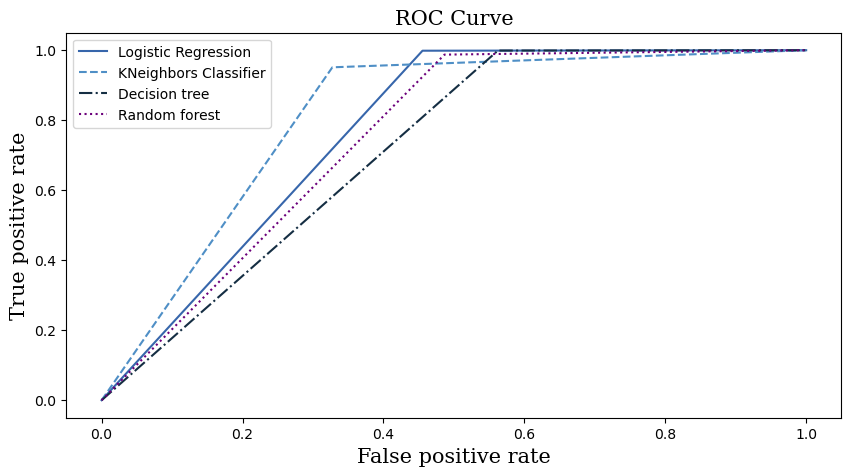

In [56]:
fpr1, tpr1, thresh1 = roc_curve(y_test, lrpre, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, knnpre, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, arbolpre, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, randpre, pos_label=1)
plt.figure(figsize=(10,5))
plt.plot(fpr1, tpr1, linestyle='-',color='#3766ab', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='#4f8fc6', label='KNeighbors Classifier')
plt.plot(fpr3, tpr3, linestyle="dashdot",color='#152e43', label='Decision tree')
plt.plot(fpr4, tpr4, linestyle=":",color='#6B007B', label="Random forest")

plt.xlabel('False positive rate',fontdict={'family': 'serif'},size=15)
plt.ylabel('True positive rate',fontdict={'family': 'serif'},size=15)
plt.legend()
plt.title("ROC Curve",loc="center",fontdict={'family': 'serif'},size=15)

plt.show()

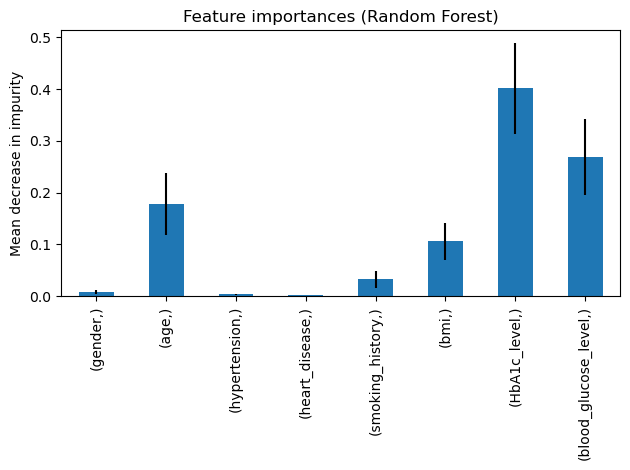

In [57]:
#Al ver los resultados también quise evaluar la importancia de cada variable para evidenciar la calidad del dataset 

feature_names = [x_test.columns.values]
importances = rand.feature_importances_
std = np.std([tree.feature_importances_ for tree in rand.estimators_], axis=0)
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances (Random Forest)")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


# Conclusiones 
Se pudo completar el proyecto propuesto, implementando diferentes modelos de machine learning para predecir si un paciente padece o no diabetes. Como se pudo evaluar, los datos fuente del proyecto tenían un desbalance y algunas variables aportaban poca información relacionada con el objetivo del proyecto. Finalmente, de los modelos que se utilizaron el que mejores resultados dio fue la regresión logística. 